In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Preprocessing Functions
These functions will modify the frames of the video image in order to separate each well into a different image that can be investigated and not cause interference between reading each well. 

# Try using the test lepton images - convert to array and section off there 
    * forced to lock in postiton to ensure that it doesn't move

# Inputs for all functions

* until we obtain a frame from a video as a test image - I will be using a set of drawn well plates with varying degrees of tilt to test the boundry definition and tiling. 

(1536, 2048, 4)

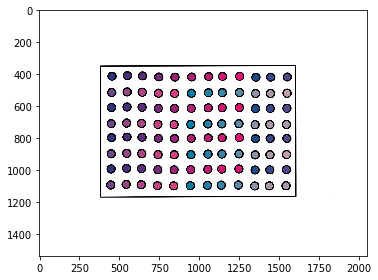

In [23]:
image = io.imread('../musicalrobot/data/Wellplatedrawn.png') 
image2 = io.imread('../musicalrobot/data/Lepton_Capture.tiff')
io.imshow(image)
type(image)
image.shape

## Preprocessing 1: Boundry definition
This will cut out the well plate from the background of the frame - the well plate dimensions should not change so no further modifications will be needed to ensure the cuts are in the correct places. 

## Preprocessing 2: Tiling each well into a seperate image
In order to ensure that there is not temperature spill over from other frames we will tile the single frame in to 96 separate images - this will allow each frame to be read as 96 individual temperatures. 

#### Steps
* Assign data to each image (image number running left to right then wrapping to begining/ frame data (if available)/ temp (when recieved))
* Stack images into an array that describes the entire frame
* Loads stacked images into arrays (?)
* Wrapper for all functions

### Finding data about the image

In [3]:
frames, height, width = image2.shape

In [4]:
tilewidth = width/12
tileheight = height / 8
tilesize = [tilewidth, tileheight]
print(tilesize)

[13.333333333333334, 15.0]


### Cropping a single image into 96 sections

In [7]:
chosen = image2[0]
imarray = np.array(chosen)
height, width = chosen.shape

In [8]:
divh = int(height/8) #height of tile 
divw = int(width/12) #width of tile

print(divh, divw)
wellh = 8 #number of wells height in 96 well plate
wellw = 12 #number of wells width in 96 well plate

15 13


In [9]:
print(range(wellh))

range(0, 8)


In [ ]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

for i in range(wellh):
    for j in range(wellw):
        xbeg = divh * j
        ybeg = divw * i
        for k in range(divh):
            for m in range(divw):
                rowin = xbeg + k
                colin = ybeg + m
                #print(rowin, colin)
                if rowin >= height:
                    rowin = height - 1
                else:
                    pass
                if colin >= width:
                    colin = width - 1
                else:
                    pass
                value = imarray[rowin][colin]
                splice[k][m] = value
        allsplice[i][j] = splice
    print(allsplice.shape)

In [ ]:
allsplice[5][5]

In [ ]:
diff = allsplice[5][5] - allsplice[1][5]
diff

In [ ]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

for i in range(wellh):
    for j in range(wellw):
        xbeg = divh * j
        ybeg = divw * i
        yend = divh * i
        xend = divw * j
        splice = imarray[ybeg:yend, xbeg:xend]
        #print(splice)
        allsplice[i][j] = splice
    #print(allsplice.shape)

In [ ]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = []
splice = np.zeros((divh, divw), dtype = object)
xbeg = 0
ybeg = 0

for k in range(divh):
    #print(k)
    #print(xbeg, ybeg)
    for m in range(divw):
        #print(m)
        rowin = ybeg + k
        colin = xbeg + m
        #print(rowin, colin)
        value = imarray[rowin][colin]
        splice[k][m] = value


In [ ]:
allsplice = np.zeros((wellh, wellw), dtype = object)


In [ ]:
splice = np.zeros((divh, divw))
splice[3,3] = 5

In [ ]:
allsplice[0,0] = splice[:]

In [ ]:
allsplice[0,0]

In [ ]:
array =([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
array[1][2]

In [ ]:
array[:2][:1]

## More

In [24]:
chosen = image

height, width, trash = image.shape
print(height,width)

1536 2048


In [25]:
divx = int(height/8)
divy = int(width/12)
print(divx,divy)
wellx = 8 #number of wells height in 96 well plate
welly = 12 #number of wells width in 96 well plate

192 170


In [30]:
allsplice = np.zeros((wellx,welly),dtype=object)
i =0 

for x in range(wellx):
    for y in range(welly):
        ybeg = divx * (x)
        yend = divx * (x+1)
        xbeg = divy * (y)
        xend = divy * (y+1)
        allsplice[x,y] = image[ybeg:yend,xbeg:xend]
print(allsplice.shape)

(8, 12)


In [31]:
allsplice[5][1]

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [32]:
diff = allsplice[5][5] - allsplice[1][5]
diff

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

### 

### Flooding single cell

In [10]:
allsplice = np.zeros((wellh, wellw), dtype = object)
splice = np.zeros((divh, divw), dtype = object)

for i in range(wellh):
    for j in range(wellw):
        xbeg = divh * j
        ybeg = divw * i
        for k in range(divh):
            for m in range(divw):
                rowin = xbeg + k
                colin = ybeg + m
                #print(rowin, colin)
                if rowin >= height:
                    rowin = height - 1
                else:
                    pass
                if colin >= width:
                    colin = width - 1
                else:
                    pass
                value = image[rowin][colin]
                splice[k][m] = value
        allsplice[i][j] = splice
    print(allsplice.shape)

(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)
(8, 12)


In [13]:
single = allsplice[0,1]
single

array([[array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8)],
       [array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),
        array([255, 255, 255, 255], dtype=uint8),

### Soft: User modiciations
While we are using the 96 well plates for this experiment, there are many different sizes of well plates that will need to be accounted for. This will change the tiling and the sizes of the tiles in order to accomodate the change in wells. Our specific robot is designed with 96 well plates in mind although custom containers can be added with different specificiations. 

#### Common well plate specifications
* 96 well plate (2:3 rectangular mix - 8x12)
* 384 well plate (2:3 rectanguar mix - 16x24)
* 24 well plate (3x6)
